In [32]:
# handling file data
import pandas as pd
# handling numerical data
import numpy as np
# for ploting/visualisation
import matplotlib.pyplot as plt
import seaborn as sns 

# importing Natural Language Toolkit
import nltk

# removing stopwords
from nltk.corpus import stopwords
# lamatize text data
from nltk.stem import WordNetLemmatizer

In [75]:
train = pd.read_csv("/Users/ankitbaliyan/Documents/VS_Code/NLP_Disaster/dataset/train.csv")
test = pd.read_csv("/Users/ankitbaliyan/Documents/VS_Code/NLP_Disaster/dataset/test.csv")
submission = pd.read_csv("/Users/ankitbaliyan/Documents/VS_Code/NLP_Disaster/dataset/sample_sub.csv")

train=train[['text','target']]
test=test[['text']]

In [61]:
# separating train and test data
i= train.shape[0]
train = data.iloc[:i]
test = data.iloc[i:]

In [46]:
train.head()

,text,length,target
0,Our Deeds are the Reason of this #earthquake M...,69,1.0
1,Forest fire near La Ronge Sask. Canada,38,1.0
2,All residents asked to 'shelter in place' are ...,133,1.0
3,"13,000 people receive #wildfires evacuation or...",65,1.0
4,Just got sent this photo from Ruby #Alaska as ...,88,1.0


In [47]:
preprocess_and_train(train)

/var/folders/js/fsn_mzw97y33gfyf27km75kh0000gn/T/ipykernel_10043/586650901.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].apply(nltk.word_tokenize)
/var/folders/js/fsn_mzw97y33gfyf27km75kh0000gn/T/ipykernel_10043/586650901.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].apply(lambda x: [word.lower() for word in x])
/var/folders/js/fsn_mzw97y33gfyf27km75kh0000gn/T/ipykernel_10043/586650901.py:21: SettingWithCopyWarning: 
A value is trying to be set o

Classification Report:
              precision    recall  f1-score   support

         0.0       0.77      0.91      0.83       874
         1.0       0.83      0.64      0.72       649

    accuracy                           0.79      1523
   macro avg       0.80      0.77      0.78      1523
weighted avg       0.80      0.79      0.78      1523

Accuracy: 0.7905449770190414


In [176]:
train = pd.read_csv("/Users/ankitbaliyan/Documents/VS_Code/NLP_Disaster/dataset/train.csv")
test = pd.read_csv("/Users/ankitbaliyan/Documents/VS_Code/NLP_Disaster/dataset/test.csv")
submission = pd.read_csv("/Users/ankitbaliyan/Documents/VS_Code/NLP_Disaster/dataset/sample_sub.csv")

train=train[['text','target']]
test=test[['text']]

In [162]:
train.shape

(7613, 2)

In [170]:
import re
import nltk
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report

def preprocess_train_predict(train, test):
    df=pd.concat([train, test], axis=0)
    df.shape

    # Tokenization
    df['text'] = df['text'].apply(nltk.word_tokenize)
    
    # Text Lowercasing
    df['text'] = df['text'].apply(lambda x: [word.lower() for word in x])
    
    # Stop Word Removal
    stop_words = set(stopwords.words('english'))
    df['text'] = df['text'].apply(lambda x: [word for word in x if word not in stop_words])
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    df['text'] = df['text'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
    
    # Removing Special Characters and Punctuation
    df['text'] = df['text'].apply(lambda x: [re.sub(r"[^a-zA-Z0-9]", "", word) for word in x])
    
    # Handling Numerical Values and # Words
    df['text'] = df['text'].apply(lambda x: [re.sub(r"\d+", "NUM", word) for word in x])
    df['text'] = df['text'].apply(lambda x: [re.sub(r"#\w+", "", word) for word in x])

    
    # Vectorization
    vectorizer = TfidfVectorizer()    
    X_train_df = vectorizer.fit_transform(train['text'].apply(lambda x: " ".join(x)))
    X_test_df = vectorizer.transform(test['text'].apply(lambda x: " ".join(x)))
    y_train = train['target']

    
    # Split the dataset into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X_train_df, y_train, test_size=0.2, random_state=42)
    
    # Build the logistic regression model
    model = LogisticRegression()
    model2 = LogisticRegression()
    model.fit(X_train, y_train)
    model2.fit(X_train_df, y_train)
    
    # Predict on the validation set
    y_pred = model.predict(X_val)
    y_test_pred = model2.predict(X_test_df)
    
    # Evaluate the model
    classification_repor = classification_report(y_val, y_pred)
    accuracy = model.score(X_val, y_val)
    
    print("Classification Report:")
    print(classification_repor)
    print("Accuracy:", accuracy)
    return (y_test_pred)



In [202]:
preprocess_train_predict(train,test)

ValueError: empty vocabulary; perhaps the documents only contain stop words

In [196]:
import re
import nltk
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer

def preprocess(train_df, test_df):
    # Concatenate train and test data for consistent preprocessing
    combined_df = pd.concat([train_df, test_df], axis=0)

    # Tokenization
    
    combined_df['text'] = combined_df['text'].apply(nltk.word_tokenize)

    # Text Lowercasing
    combined_df['text'] = combined_df['text'].apply(lambda x: [word.lower() for word in x])

    # Stop Word Removal
    
    stop_words = set(stopwords.words('english'))
    combined_df['text'] = combined_df['text'].apply(lambda x: [word for word in x if word not in stop_words])

    # Lemmatization
    
    lemmatizer = WordNetLemmatizer()
    combined_df['text'] = combined_df['text'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

    # Removing Special Characters and Punctuation
    combined_df['text'] = combined_df['text'].apply(lambda x: [re.sub(r"[^a-zA-Z0-9]", "", word) for word in x])

    # Handling Numerical Values and # Words
    combined_df['text'] = combined_df['text'].apply(lambda x: [re.sub(r"\d+", "NUM", word) for word in x])
    combined_df['text'] = combined_df['text'].apply(lambda x: [re.sub(r"#\w+", "", word) for word in x])

    # Filter out documents that are empty or contain only stop words
    combined_df['text'] = combined_df['text'].apply(lambda x: [word for word in x if word.strip() != ''])
    combined_df = combined_df[combined_df['text'].apply(lambda x: len(x) > 0)]
    return combined_df

    """
    # Vectorization
    vectorizer = TfidfVectorizer()
    X_train = vectorizer.fit_transform(train_df['text'].apply(lambda x: " ".join(x)))
    X_test = vectorizer.transform(test_df['text'].apply(lambda x: " ".join(x)))
    y_train = train_df['target']

    # Check if vocabulary is empty
    if not vectorizer.vocabulary_:
        raise ValueError("Empty vocabulary. Check the preprocessing steps, as all documents may contain only stop words.")

    # Build the logistic regression model
    model = LogisticRegression()
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    return y_pred
    """

In [199]:
combined_df = preprocess(train,test)

In [206]:
# separating train and test data
i= train.shape[0]
train = combined_df.iloc[:i]
test = combined_df.iloc[i:]
print("train:",train.shape)
print("test:",test.shape)
test.head()

train: (7613, 2)
test: (3262, 2)


,text,target
0,"[happened, terrible, car, crash]",NaN
1,"[heard, earthquake, different, city, stay, saf...",NaN
2,"[forest, fire, spot, pond, goose, fleeing, acr...",NaN
3,"[apocalypse, lighting, spokane, wildfire]",NaN
4,"[typhoon, soudelor, kill, NUM, china, taiwan]",NaN


In [198]:
def predict(train_df, test_df):
    # Vectorization
    vectorizer = TfidfVectorizer()
    X_train = vectorizer.fit_transform(train_df['text'].apply(lambda x: " ".join(x)))
    X_test = vectorizer.transform(test_df['text'].apply(lambda x: " ".join(x)))
    y_train = train_df['target']

    # Check if vocabulary is empty
    if not vectorizer.vocabulary_:
        raise ValueError("Empty vocabulary. Check the preprocessing steps, as all documents may contain only stop words.")

    # Build the logistic regression model
    model = LogisticRegression()
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    return y_pred

In [208]:
test_pred = predict(train, test)

<AxesSubplot:xlabel='0'>

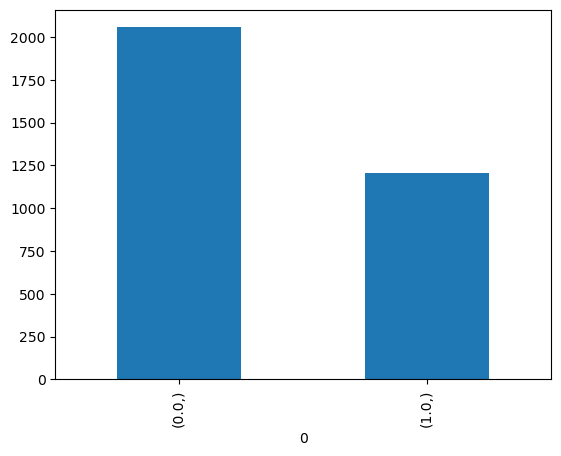

In [212]:
pd.DataFrame(test_pred).value_counts().plot.bar()